DBSCAN(Density-based spatial clustering of application with noise)

군집분석(clustering)은 대표적인 비지도학습(unsupervised learning)으로 크게 중심 기반(center-based) 알고리즘과 밀도 기반(density-based) 알고리즘으로 나눌 수 있다.
- 중심 기반 알고리즘은 "동일 군집에 속하는 데이터는 어떠한 중심을 기준으로 분포할 것"이라는 가정을 기반으로 한다.
- 밀도 기반 알고리즘은 "동일 군집에 속하는 데이터는 서로 근접하게 분포할 것"이라는 가정을 기반으로 한다. 중심 기반의 가장 대표적인 알고리즘으로 k-평균(k-means)이 있으며, 밀도 기반 알고리즘에는  DBSCAN이 있다.


- 중심 기반 알고리즘의 경우 중심을 기준으로 군집을 형성하기 때문에 원의 형태를 가지게 된다.
- 반면, 밀도 기반 알고리즘의 경우 이웃 데이터를 기준으로 군집을 형성하기 때문에 불특정한 형태를 가지게 된다.

이 말은 즉, 데이터의 형태가 불특정한 분포의 형태를 띨 때, 밀도 기반 군집을 이용하면 적절하다! 또한, 지정된 밀도 안에 속하지 못해 군집에 포함되지 못한 데이터는 잡음(noise) or 이상치(outlier)로 판단할 수 있으며 이를 이용해 Anomaly detection에 활용할 수 있다.  중심-기반 알고리즘의 대표적인 방법으로는 k-평균 군집이 있다.

** 모수(Parameter)
 - ϵ : 데이터로부터의 반경(= ϵ-neighbirhood of x)
 - minPts : 군집을 구성하는데 필요한 최소의 데이터 수


** 분류 점(Point)
 - core point : 한 점의 ϵ-반경 내에 minPts 보다 많은 개체가 포함된 점.
 - border point : 한 점의 ϵ-반경 내에 minPts 보다 적은 개체을 포함하고 있지만, 적어도 하나의 코어점의 반경에 속하는 점.
 - noise point : 코어점 또는 경계점이 아닌 점으로,
ϵ-반경 내에 minPts 보다 적은 수의 개체를 포함 하는 점.

** DBSCAN 알고리즘의 군집화 절차

(1) ϵ(반경)과 MinPts를 설정한다.

(2) 데이터로부터 코어점의 조건을 만족하는 임의의 점을 선택한다.

(3) 밀도-도달가능한 점들을 뽑아서 코어점과 경계점을 구분하고, 이에 속하지 않은 점들을 잡음으로 구분한다.

(4) ϵ-반경 안에 있는 코어점들을 서로 연결한다.

(5) 연결된 코어점들을 하나의 군집으로 형성한다.

(6) 모든 경계점들은 어느 하나의 군집에 할당한다. (여러 군집에 걸쳐있는 경우, 반복 과정에서 먼저 할당된 군집으로 할당)



** DBSCAN    vs    K-means


K-means 군집은 생성할 군집의 수를 지정해주어야 하지만, DBSCAN은 군집의 수를 지정해주지 않아도 된다. 또한, 서론에서 말했듯이 k-means는 평균 기반 알고리즘으로 군집이 원의 형태를 가지게 되지만, DBSCAN의 경우, 불특정한 형태의 군집을 형성할 수 있다. K-means 알고리즘은 평균을 취하기 때문에 이상치에 민감하며, DBSCAN은 잡음점을 식별하므로 이상치에 민감하지 않다(robust).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
# Moon 데이터셋 활용- 샘플수(n_samples)와 분산정도(noise)를 조절해서 생성
X,y  = make_moons(n_samples = 300, noise = 0.05, random_state = 42)
df = pd.DataFrame(X)
df.head()

,0,1
0,0.622519,-0.372101
1,1.904269,-0.136303
2,-0.069431,0.456117
3,0.933899,0.237483
4,1.180360,-0.490847


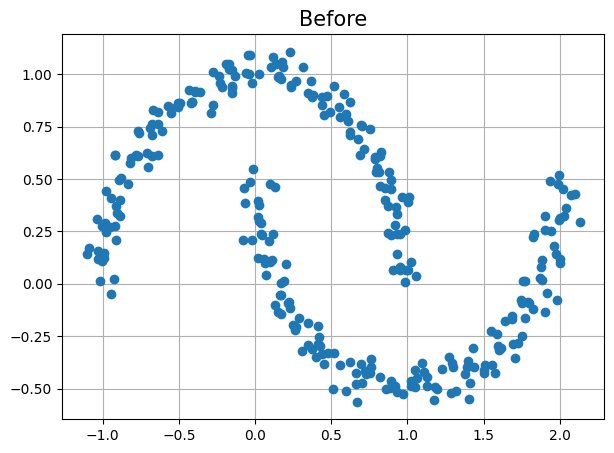

In [3]:
# 산점도
plt.figure(figsize=(7,5))
plt.title('Before', fontsize = 15)
plt.plot(df[0], df[1], 'o')
plt.grid()
plt.show()

In [28]:
# DBSCAN 함수로 클러스터링
# eps :  반경설정(속성값의 범위), min_samples:최소 개체 수
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps = 0.3, min_samples=5).fit(X)
cluster_db = db_scan.labels_
df['cluster_db'] = cluster_db
df['target'] = y

In [29]:
df.head()

,0,1,cluster_db,target
0,0.622519,-0.372101,0,1
1,1.904269,-0.136303,0,1
2,-0.069431,0.456117,0,1
3,0.933899,0.237483,1,0
4,1.180360,-0.490847,0,1


In [23]:
# 타켓 클래스 종류 확인
print(set(df['target']))
print(set(df['cluster_db']))

{0, 1}
{0, 1}


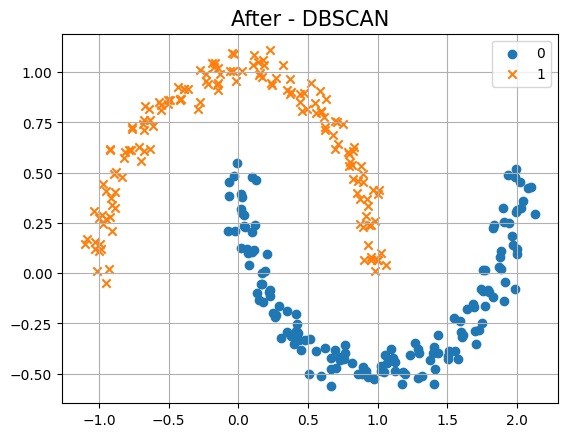

In [24]:
# DBSCAN을 이용한 데이터 플랏
markers = ['o','x']
for i , mark in enumerate(markers):
    df_i = df[df['cluster_db']==i]
    target_i = i
    X1 = df_i[0]
    X2 = df_i[1]
    plt.scatter(X1,X2, marker = mark, label = target_i)
plt.title('After - DBSCAN', fontsize = 15)
plt.grid()
plt.legend()
plt.show()

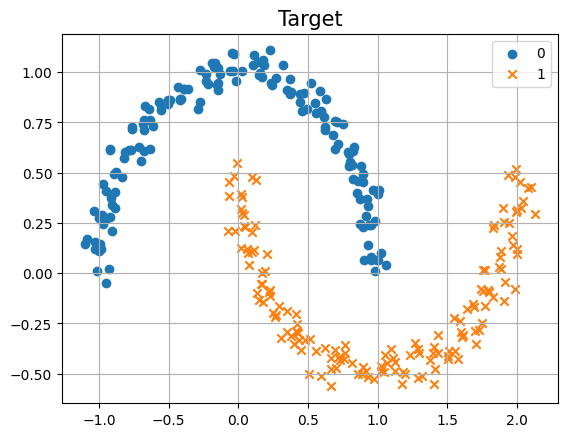

In [25]:
# 실제 타켓 플랏
markers = ['o','x']
for i , mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i[0]
    X2 = df_i[1]
    plt.scatter(X1,X2, marker = mark, label = target_i)
plt.title('Target', fontsize = 15)
plt.grid()
plt.legend()
plt.show()

In [30]:
#  모형 평가
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, cluster_db)
print(sil_score)


0.33078776489960326


K-means와 DBSCAN 비교

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state =42).fit(X)
cluster_km = kmeans.labels_
df['cluster_km']= cluster_km

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


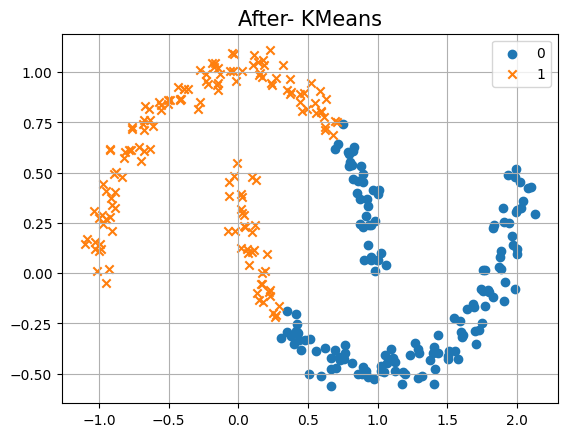

In [33]:
# kmeans 플랏
markers = ['o','x']
for i , mark in enumerate(markers):
    df_i = df[df['cluster_km']==i]
    target_i = i
    X1 = df_i[0]
    X2 = df_i[1]
    plt.scatter(X1,X2, marker = mark, label = target_i)
plt.title('After- KMeans', fontsize = 15)
plt.grid()
plt.legend()
plt.show()

이렇게 기하학적인 특징을 가진 데이터나 이상치가 있는 경우 K-means 왜곡된 결과를 초래할 가능성이 있으므로 EDA(탐색적 자료분석)를 통해 적절한 방법론을 적용할 줄 알아야 한다.

** K-means

- 군집의 수(k)를 미리 결정
- 중심점(Centroid) 갱신을 통해 비용함수를 최적화
- 이상치에 영향을 많이 받음

** DBSCAN

- 반경(eps), 최소 개체 수(minPts)를 미리 결정
- 자동적으로 군집의 수 결정
- 군집 간 개체들이 섞이지 않음(최소 반경 내에 한해서)
- 노이즈 개념으로 이상치 검출이 가능

(https://yganalyst.github.io/ml/ML_clustering/)
